In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATAPATH = "topicclass/"

In [3]:
def getXY(fname):
    X, Y = [], []
    with open(fname, 'r') as f:
        all_lines = f.read().split('\n')
        for line in all_lines:
            line = line.strip()
            if len(line) == 0:
                continue
            y, x = line.split(" ||| ")
            # correct for validatin mistake in labels
            if y == "Media and darama":
                y = "Media and drama"
            X.append(x)
            Y.append(y)
    assert len(X) == len(Y)
    return X, Y

In [4]:
X_train, Y_train= getXY(DATAPATH + 'topicclass_train.txt')
X_valid, Y_valid = getXY(DATAPATH + 'topicclass_valid.txt')
print("train data len: {}".format(len(X_train)))
print("valid data len: {}".format(len(X_valid)))

train data len: 253909
valid data len: 643


In [9]:
X_test, Y_test= getXY(DATAPATH + 'topicclass_test.txt')
print("test data len: {}".format(len(X_test)))

test data len: 697


In [13]:
total_length = len(X_train) + len(X_valid) + len(X_test)
print("train proportion {}, valid proportion {}, test proportion {}".format(
    len(X_train) * 100 / total_length,
    len(X_valid) * 100 / total_length,
    len(X_test) * 100 / total_length
))

train proportion 99.47502242907906, valid proportion 0.2519108791807216, test proportion 0.2730666917402223


In [12]:
print(total_length)

255249


### Check if dataset only consists of sentences

In [6]:
for text in X_train + X_valid:
    if " . " in text:
        print(text)

### Check if all sentences end in full stop

In [8]:
for text in X_train + X_valid:
    if text[-1] != '.':
        print(text)

### Number of classes

In [14]:
print(len(set(Y_train)), len(set(Y_valid)))

16 12


## Plot validation data distribution

In [30]:
def plot_data(data):
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=90, fontsize=20)
    # plot sorted by the values most popular in training
    plot = sns.countplot(data, order=pd.Series(Y_train).value_counts().index)
    plot.set_xlabel('classes', fontsize=25)
    plot.set_ylabel('Frequency', fontsize=25)

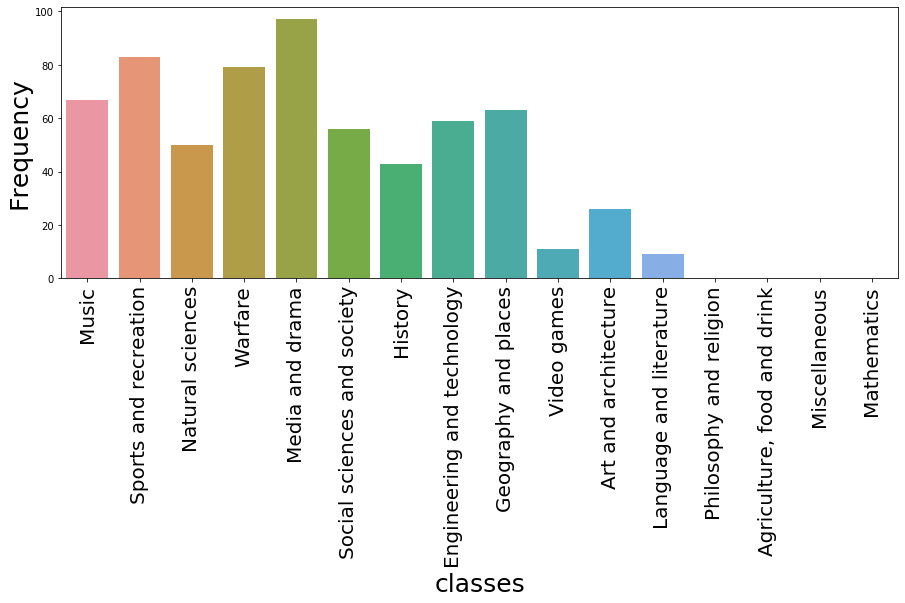

In [31]:
plot_data(Y_valid)

## Plot training data distribution

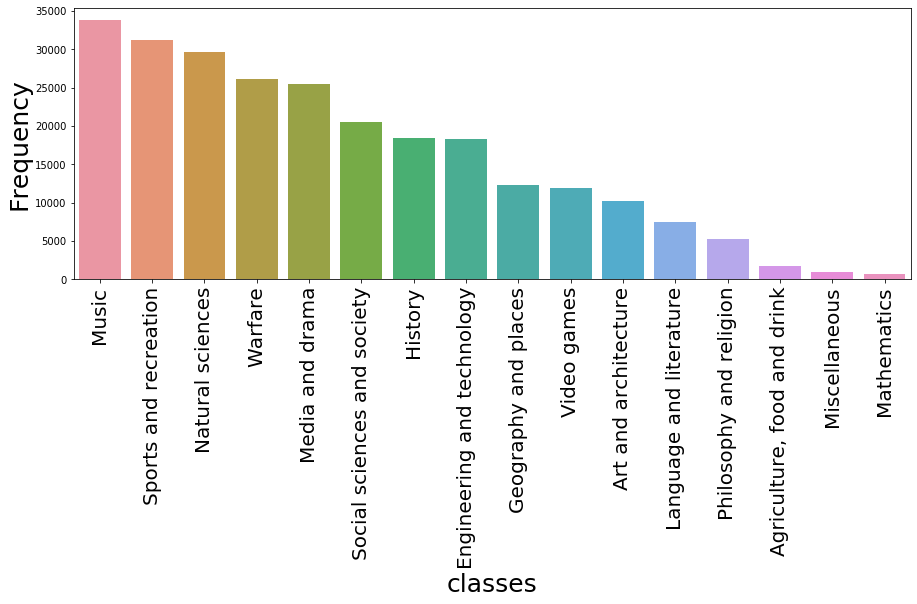

In [32]:
plot_data(Y_train)

## Sentence length distribution

In [33]:
lengths = [len(sent.split(' ')) for sent in X_train + X_valid]

Text(0, 0.5, 'Frequency')

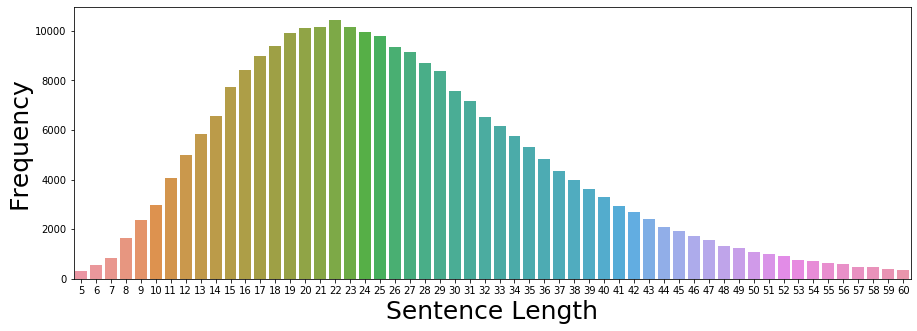

In [43]:
fig = plt.figure(figsize=(15, 5))
plot = sns.countplot(lengths)
plt.xticks(fontsize=10)
plot.set_xlabel('Sentence Length', fontsize=25)
plot.set_ylabel('Frequency', fontsize=25)